In [1]:
library(tidyverse)
library(readxl)
library(dplyr)
library(ggplot2)
require(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine





- Group Project Proposal (Group 91)

- Group member: Elliott Au, Eric Lew, Zeren Lai

- ***Title***
    -  Observation of students' performance on online learning platforms - Relationship between study habits and exam performance of users.  


- ***Introduction***
    
      - Students always wonder what they should do to maximize their exam performance .To answer this issue, we will analyze the dataset 'User Knowledge' and determine the best study habits a student should adopt to obtain higher grades.

     -   The dataset we will use is about the study habits of students with the new online learning platform and their exam performance. The dataset contains six variables: STG, SCG, STR, LPR, PEG, and UNS. <br>
     
      -STG is the degree of study time for goal object materials.
      
      -SCG is the degree of repetition number of user for goal object materials. 
      
      -STR is the degree of study time of the user for related objects with the goal object. 
      
      -LPR is the exam performance of the user for related objects with the goal object.
      
      -PEG is the exam performance of the user for goal objects.
      
      -UNS is the knowledge level of the user. 
 
     -   We would use five columns of the dataset: STG, SCG, STR, LPR, and PEG, along with a regression model to answer our  three research questions:
 
      -Whether studying related object materials helps students learn better about goal objects?
     
      -How much time should students spend studying to get the highest possible result?
      
      -The ideal number of repetitions to improve that can help students improve their exam results
   


***Preliminary exploratory data analysis***

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.00,0.00,0.00,0.00
0.08,0.08,0.10,0.24,0.90
0.06,0.06,0.05,0.25,0.33
0.10,0.10,0.15,0.65,0.30
0.08,0.08,0.08,0.98,0.24
0.09,0.15,0.40,0.10,0.66


Categories,Mean,Max,Min,Num_rows
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
STG,0.3711473,0.99,0,258
SCG,0.3556744,0.90,0,258
STR,0.4680039,0.95,0,258
LPR,0.4327132,0.99,0,258
PEG,0.4585388,0.93,0,258


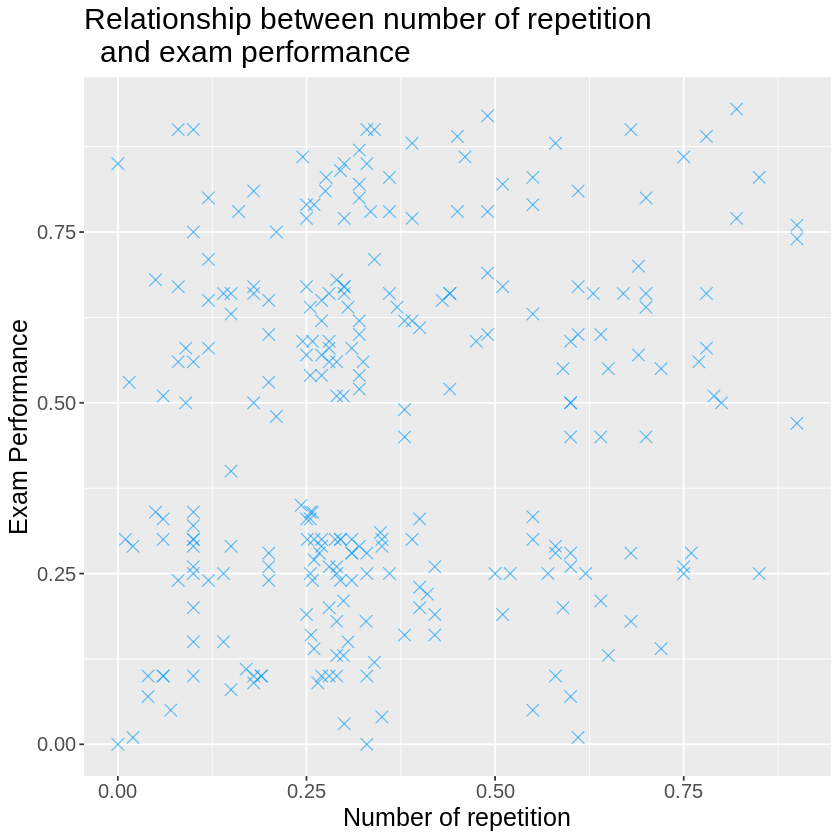

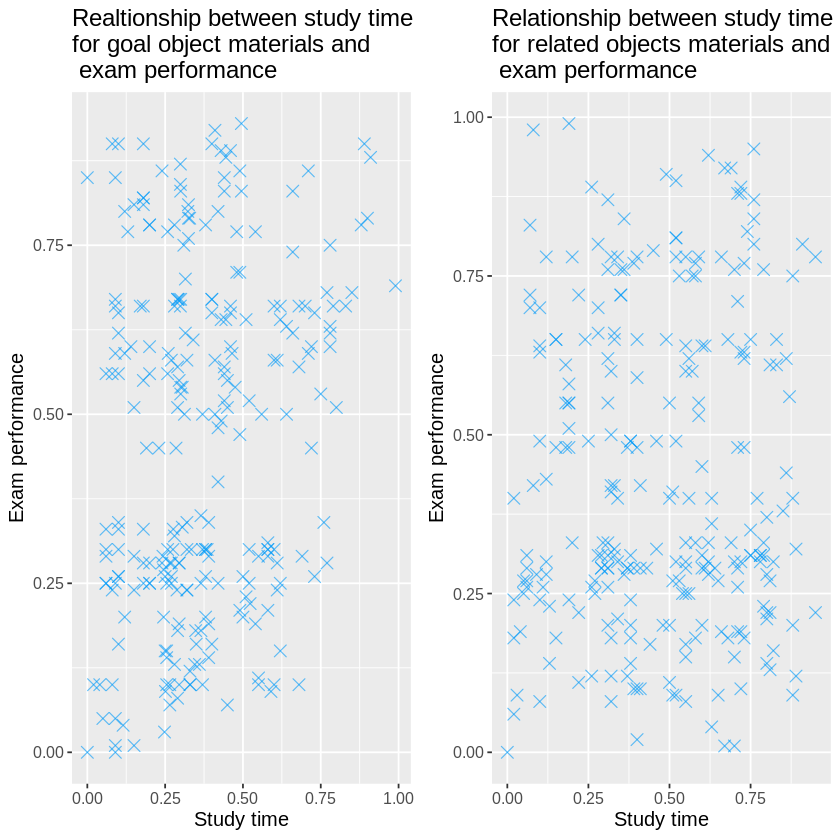

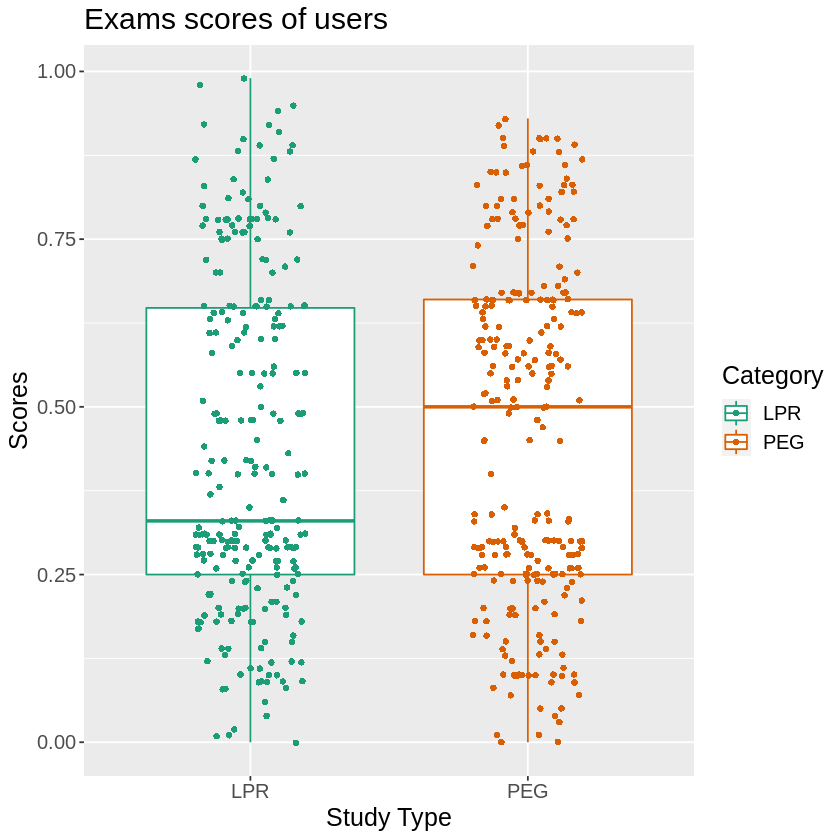

In [2]:
Training_Data <- read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN (3).xls" , "Training_Data")|>
    subset( select = c( STG:UNS)) 


head_data <- Training_Data |> 
             select(STG:PEG) |>
             head()

head_data

#Row Number 
row_num <- Training_Data |> 
           nrow()

row_num <- data.frame(Categories =c('STG', 'SCG', 'STR', 'LPR','PEG'),
                 Num_rows=c(258, 258, 258, 258,258))|>
            select(Num_rows)
            

#Mean
mean_data <- Training_Data |>
              select(STG:PEG) |> 
              map_dfr(mean)

mean_data <- pivot_longer(mean_data , cols =c("STG" , "SCG" ,"STR", "LPR" ,"PEG"),
                          names_to ="Categories",
                          values_to ="Mean")

#Max
max_data <- Training_Data |> 
              select(STG:PEG) |>
              map_dfr(max)

max_data <- pivot_longer(max_data , cols =c("STG" , "SCG" ,"STR", "LPR" ,"PEG"),
                          names_to ="Categories",
                          values_to ="Max")|>
            select(Max)
#Min
min_data <- Training_Data |> 
              select(STG:PEG) |> 
              map_dfr(min)

min_data <- pivot_longer(min_data , cols =c("STG" , "SCG" ,"STR", "LPR" ,"PEG"),
                          names_to ="Categories",
                          values_to ="Min")|>
            select(Min)
    
Summary_data <- bind_cols(mean_data, max_data,min_data, row_num ,id = NULL)  
Summary_data

Box_plot <- Training_Data [ , c(4 , 5)]|>
    pivot_longer ( c(1 ,2 ) , names_to ="Category")|>
    ggplot( aes(x=Category,y=value, color=Category)) + 
  geom_boxplot()+
  scale_color_brewer(palette="Dark2") + 
  geom_jitter(shape=16, position=position_jitter(0.2))+
  labs(title = 'Exams scores of users',
       y='Scores',x='Study Type')+
    theme(text=element_text(size=15))

scatter_plot <- ggplot(data=Training_Data ,aes(x= SCG, y= PEG , )) + 
  geom_point(size =3, color = "#0099f9", shape = 4, alpha = 0.6)+
  labs(title = 'Relationship between number of repetition \n  and exam performance',
       y='Exam Performance',x='Number of repetition')+
    theme(text=element_text(size= 15))

 
scatter_plot_1 <- ggplot(data=Training_Data ,aes(x= STG, y= PEG , )) + 
  geom_point(size =3, color = "#0099f9", shape = 4, alpha = 0.6)+
  labs(title = 'Realtionship between study time \nfor goal object materials and \n exam performance',
       y='Exam performance',x='Study time')+
    theme(text=element_text(size= 12))

scatter_plot_2 <- ggplot(data=Training_Data ,aes(x= STR, y= LPR , )) + 
  geom_point(size =3, color = "#0099f9", shape = 4, alpha = 0.6)+
  labs(title = 'Relationship between study time \nfor related objects materials and \n exam performance',
       y='Exam performance',x='Study time')+
    theme(text=element_text(size= 12))


scatter_plot
grid.arrange(scatter_plot_1, scatter_plot_2
             , ncol=2)

Box_plot

- ***Methods***

   -We will
   - use boxplot to make comparisons between LPR (the exam performance of users who study related object materials and the goal object materials) and PEG (the exam performance of users who only study the goal object materials).

   -  use a scatterplot to show the relationship between SCG (the degree of the repetition number of user for the goal object materials) and PEG (the exam performance of user for goal objects). 

   - examine the relationship between study time and exam performance by generating 2 scatterplots to show the relationship between STG (the degree of study time for goal object materials) and PEG (the exam performance of user for goal objects), and the relationship between STR (the degree of study time of user for related objects with goal object) and LPR (the exam performance of user for related objects with goal object)

-  ***Expected Outcomes and Significance***

     -We believe studying related objects benefits students by strengthening their understanding of the goal object, as there is a connection between related objects and goal objects. In addition, there should be a positive relationship between the number of repetitions and study time of users and their exam performance.
 
    -Thus, we have three expectations:
   - Students who study related object materials and goal object materials will perform better than those who only study goal object materials. 
   - The higher the degree of study time, the better the students' exam performance. 
   - The higher the number of repetitions with the materials, the better the students' exam performance.<br />                                                                                                                                                               
     -The findings can contribute to the research area of education. In the future, researchers can further improve the quality of teaching and student learning experience by designing better study habits for students based on the   conclusions of the findings.<br />  

     -Our findings can lead to further research questions: Whether students have a better learning experience by studying/ majoring in 2 related/ similar areas (e.g., Chemistry and Physics or English Literature and History) simultaneously. 

